## Import delle librerie

In [1]:
#import delle librerie utili
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Import del dataset

In [2]:
from google.colab import files 
file = files.upload() #il metodo upload() permette di caricare file in Colab
#i vari file .csv sono disponibili nel repository di GitHub 

Saving circuits.csv to circuits.csv
Saving constructor_results.csv to constructor_results.csv
Saving constructor_standings.csv to constructor_standings.csv
Saving constructors.csv to constructors.csv
Saving driver_standings.csv to driver_standings.csv
Saving drivers.csv to drivers.csv
Saving lap_times.csv to lap_times.csv
Saving pit_stops.csv to pit_stops.csv
Saving qualifying.csv to qualifying.csv
Saving races.csv to races.csv
Saving results.csv to results.csv
Saving seasons.csv to seasons.csv
Saving status.csv to status.csv


# **Lettura file**

In [3]:
circuits = pd.read_csv("circuits.csv")
constructor_results = pd.read_csv("constructor_results.csv")
constructor_standings = pd.read_csv("constructor_standings.csv")
constructors = pd.read_csv("constructors.csv")
driver_standings = pd.read_csv("driver_standings.csv")
drivers = pd.read_csv("drivers.csv")
lap_times = pd.read_csv("lap_times.csv")
pit_stops = pd.read_csv("pit_stops.csv")
qualifying = pd.read_csv("qualifying.csv")
races = pd.read_csv("races.csv")
results = pd.read_csv("results.csv")
seasons = pd.read_csv("seasons.csv")
status = pd.read_csv("status.csv")

In [92]:
print(drivers.columns)
print(qualifying.columns)

drivers_and_qualifying = pd.merge(drivers,qualifying, on='driverId')
drivers_and_qualifying

Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')
Index(['qualifyId', 'raceId', 'driverId', 'constructorId', 'number',
       'position', 'q1', 'q2', 'q3'],
      dtype='object')


,driverId,driverRef,number_x,code,forename,surname,dob,nationality,url,qualifyId,raceId,constructorId,number_y,position,q1,q2,q3
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,1,22,1,1:26.572,1:25.187,1:26.714
1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,26,19,1,22,4,1:35.392,1:34.627,1:36.709
2,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,47,20,1,22,3,1:32.750,1:31.922,1:33.292
3,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,71,21,1,22,5,1:21.366,1:20.825,1:22.096
4,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,91,22,1,22,3,1:26.192,1:26.477,1:27.923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9130,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher,9093,1070,210,47,18,1:18.858,\N,\N
9131,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher,9114,1071,210,47,19,1:10.329,\N,\N
9132,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher,9134,1051,210,47,19,1:23.407,\N,\N
9133,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher,9154,1072,210,47,19,1:29.464,\N,\N


# **Tabella results**

# Analisi dei dati

In [75]:
#visualizzazione dei dati
print(results)

#visualizzazione colonne
print(results.columns)

#conteggio dei dati
results.count()

       resultId  raceId  driverId  ...  fastestLapTime fastestLapSpeed  statusId
0             1      18         1  ...        1:27.452         218.300         1
1             2      18         2  ...        1:27.739         217.586         1
2             3      18         3  ...        1:28.090         216.719         1
3             4      18         4  ...        1:28.603         215.464         1
4             5      18         5  ...        1:27.418         218.385         1
...         ...     ...       ...  ...             ...             ...       ...
25394     25400    1073       815  ...        1:26.419         219.993         5
25395     25401    1073       849  ...        1:29.293         212.912         3
25396     25402    1073       841  ...        1:29.442         212.557         6
25397     25403    1073       847  ...        1:30.647         209.732         6
25398     25404    1073         8  ...        1:29.698         211.951        23

[25399 rows x 18 columns]
I

resultId           25399
raceId             25399
driverId           25399
constructorId      25399
number             25399
grid               25399
position           25399
positionText       25399
positionOrder      25399
points             25399
laps               25399
time               25399
milliseconds       25399
fastestLap         25399
rank               25399
fastestLapTime     25399
fastestLapSpeed    25399
statusId           25399
dtype: int64

# Relazioni tra i dati

446
614


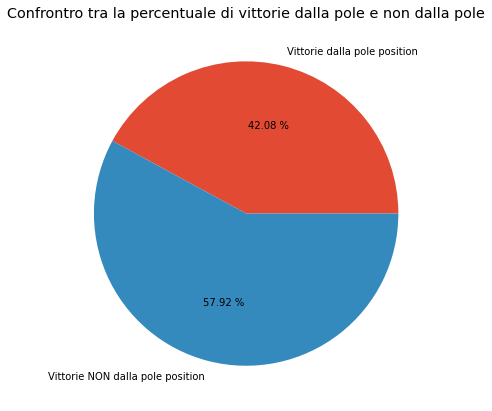

84
76


<Figure size 432x288 with 0 Axes>

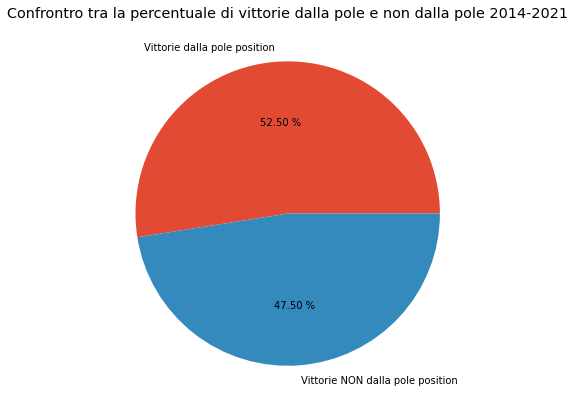

<Figure size 432x288 with 0 Axes>

In [74]:
#otteniamo il numero di piloti che hanno vinto partendo dalla prima posizione
winner_from_pole = results.loc[(results['grid'] == 1) & (results['positionOrder'] == 1)].count()[0]
print(winner_from_pole)

#otteniamo il numero di piloti che hanno vinto partendo da una posizione diversa dalla prima
winner_not_from_pole = results.loc[(results['grid'] != 1) & (results['positionOrder'] == 1)].count()[0]
print(winner_not_from_pole)

#creaimo un pie chart con questi valori
labels = ['Vittorie dalla pole position','Vittorie NON dalla pole position'] #label da utilizzare 

plt.figure(figsize=(7,7)) #dimensioni del grafico
plt.style.use('ggplot') #stile del grafico
plt.pie([winner_from_pole,winner_not_from_pole],labels=labels,autopct= '%.2f %%') #creazione del grafico
plt.title('Confrontro tra la percentuale di vittorie dalla pole e non dalla pole') #titolo del grafico
plt.show() #mostriamo il grafico
plt.savefig('Starting_position',dpi = 300) #salviamo il grafico

#uniamo i dataset results e races per ottenere l'anno in cui si sono svolte le gare
results_and_races = pd.merge(results, races, on='raceId')
results_and_races.count()

#otteniamo il numero di piloti che hanno vinto partendo dalla prima posizione dal 2014 al 2021
winner_from_pole_from_2014 = results_and_races.loc[(results_and_races['grid'] == 1) & (results_and_races['positionOrder'] == 1) & (results_and_races['year'] >= 2014)].count()[0]
print(winner_from_pole_from_2014)

#otteniamo il numero di piloti che hanno vinto partendo da una posizione diversa dalla prima dal 2014 al 2021
winner_not_from_pole_from_2014 = results_and_races.loc[(results_and_races['grid'] != 1) & (results_and_races['positionOrder'] == 1) & (results_and_races['year'] >= 2014)].count()[0]
print(winner_not_from_pole_from_2014)

#creaimo un pie chart con questi valori
labels = ['Vittorie dalla pole position','Vittorie NON dalla pole position'] #label da utilizzare 

plt.figure(figsize=(7,7)) #dimensioni del grafico
plt.style.use('ggplot') #stile del grafico
plt.pie([winner_from_pole_from_2014,winner_not_from_pole_from_2014],labels=labels,autopct= '%.2f %%') #creazione del grafico
plt.title('Confrontro tra la percentuale di vittorie dalla pole e non dalla pole 2014-2021') #titolo del grafico
plt.show() #mostriamo il grafico
plt.savefig('Starting_position_2014',dpi = 300) #salviamo il grafico

# **Tabella races**

# Analisi dei dati

In [78]:
#visualizzazione dei dati
print(races)

#visualizziamo le colonne
print(races.columns)

#conteggio dei dati
races.count()

      raceId  year  ...      time                                                url
0          1  2009  ...  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...
1          2  2009  ...  09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2          3  2009  ...  07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3          4  2009  ...  12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4          5  2009  ...  12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...
...      ...   ...  ...       ...                                                ...
1075    1092  2022  ...  05:10:00  https://en.wikipedia.org/wiki/2022_Japanese_Gr...
1076    1093  2022  ...  19:00:00  https://en.wikipedia.org/wiki/2022_United_Stat...
1077    1094  2022  ...  19:00:00  https://en.wikipedia.org/wiki/2022_Mexican_Gra...
1078    1095  2022  ...  17:00:00  https://en.wikipedia.org/wiki/2022_S%C3%A3o_Pa...
1079    1096  2022  ...  13:00:00  https://en.wikipedia.org/wiki/

,raceId,year,round,circuitId,name,date,time,url
1033,1046,2020,16,3,Sakhir Grand Prix,2020-12-06,17:10:00,https://en.wikipedia.org/wiki/2020_Sakhir_Gran...


# **Tabella qualifying**

# Analisi tabella

In [77]:
#visualizzazione dei dati
print(qualifying)

#visualizzazione colonne
print(qualifying.columns)

#conteggio dei dati
qualifying.count()

#controllo dei dati mancanti
qualifying[qualifying.isnull().any(1)] 

      qualifyId  raceId  driverId  ...        q1        q2        q3
0             1      18         1  ...  1:26.572  1:25.187  1:26.714
1             2      18         9  ...  1:26.103  1:25.315  1:26.869
2             3      18         5  ...  1:25.664  1:25.452  1:27.079
3             4      18        13  ...  1:25.994  1:25.691  1:27.178
4             5      18         2  ...  1:25.960  1:25.518  1:27.236
...         ...     ...       ...  ...       ...       ...       ...
9130       9171    1073       849  ...  1:24.338        \N        \N
9131       9172    1073       847  ...  1:24.423        \N        \N
9132       9173    1073         8  ...  1:24.779        \N        \N
9133       9174    1073       854  ...  1:24.906        \N        \N
9134       9175    1073       853  ...  1:25.685        \N        \N

[9135 rows x 9 columns]
Index(['qualifyId', 'raceId', 'driverId', 'constructorId', 'number',
       'position', 'q1', 'q2', 'q3'],
      dtype='object')


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
3880,3882,114,23,3,4,1,1:15.259,NaN,NaN
3881,3883,114,8,1,6,2,1:15.295,NaN,NaN
3882,3884,114,31,3,3,3,1:15.415,NaN,NaN
3883,3885,114,15,4,7,4,1:15.500,NaN,NaN
3884,3886,114,30,6,1,5,1:15.644,NaN,NaN
...,...,...,...,...,...,...,...,...,...
8669,8710,1046,825,210,20,16,0:54.705,NaN,NaN
8670,8711,1046,849,3,6,17,0:54.796,NaN,NaN
8671,8712,1046,851,3,89,18,0:54.892,NaN,NaN
8672,8713,1046,8,51,7,19,0:54.963,NaN,NaN


# **Tabella driver standings**

# Analisi tabella

In [79]:
#visualizzazione dei dati
print(driver_standings)

#visualizza colonne
print(driver_standings.columns)

#conteggio dei dati
driver_standings.count()

#effetuato controllo per capire cosa significa - per raceId = 1074
#driver_standings.loc[driver_standings['raceId'] == 1073]

       driverStandingsId  raceId  driverId  points  position positionText  wins
0                      1      18         1    10.0         1            1     1
1                      2      18         2     8.0         2            2     0
2                      3      18         3     6.0         3            3     0
3                      4      18         4     5.0         4            4     0
4                      5      18         5     4.0         5            5     0
...                  ...     ...       ...     ...       ...          ...   ...
33389              70776    1074       840     0.0        16            -     0
33390              70777    1074       852     0.0        17            -     0
33391              70778    1074       830     0.0        18            -     0
33392              70779    1074        20     0.0        19            -     0
33393              70780    1074       855     0.0        20            -     0

[33394 rows x 7 columns]
Index(['driver

driverStandingsId    33394
raceId               33394
driverId             33394
points               33394
position             33394
positionText         33394
wins                 33394
dtype: int64

# Relazioni tra i dati

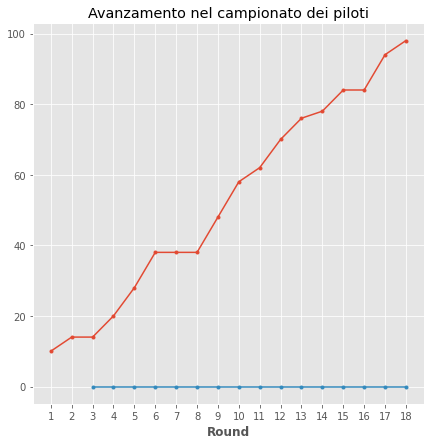

In [ ]:
df = driver_standings.merge(races, how='inner') #unione di driver_standings e races
df_copy = df.copy() #copia di sicurezza

new = df_copy.drop(columns=['positionText','time','url','date'])

#otteniamo la classifica del 2008 del pilota con id = 1
driver1 = new.loc[(new['driverId'] == 1) & (new['year'] == 2008)]
#otteniamo la classifica del 2008 del pilota con id = 16
driver16 = new.loc[(new['driverId'] == 16) & (new['year'] == 2008)]

#mostriamo un grafico dell'avanzamento nel campionato
#settiamo le dimensioni del grafico
plt.figure(figsize=(7,7))

#inseriamo nel grafico il pilota con id = 1
plt.plot(driver1['round'],driver1.points, label = 'Points',marker = '.')
#inseriamo nel grafico il pilota con id = 16
plt.plot(driver16['round'],driver16.points, label = 'Points',marker = '.')
#settiamo la dimensione dei valori dell'asse x
plt.xticks(driver1['round'][::1])
#diamo un nome all'asse delle x
plt.xlabel('Round', fontdict={'fontweight':'bold','fontsize':12})

#diamo un titolo al grafico
plt.title('Avanzamento nel campionato dei piloti')
#mostriamo il grafico
plt.show()

# **Tabella circuits**

In [80]:
#visualizzazione dei dati
print(circuits)

#visualizza colonne
print(circuits.columns)

#conteggio dei dati
circuits.count()

    circuitId  ...                                                url
0           1  ...  http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1           2  ...  http://en.wikipedia.org/wiki/Sepang_Internatio...
2           3  ...  http://en.wikipedia.org/wiki/Bahrain_Internati...
3           4  ...  http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4           5  ...         http://en.wikipedia.org/wiki/Istanbul_Park
..        ...  ...                                                ...
74         75  ...  http://en.wikipedia.org/wiki/Algarve_Internati...
75         76  ...       http://en.wikipedia.org/wiki/Mugello_Circuit
76         77  ...  http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
77         78  ...  http://en.wikipedia.org/wiki/Losail_Internatio...
78         79  ...  https://en.wikipedia.org/wiki/Miami_Internatio...

[79 rows x 9 columns]
Index(['circuitId', 'circuitRef', 'name', 'location', 'country', 'lat', 'lng',
       'alt', 'url'],
      dtype='object')


circuitId     79
circuitRef    79
name          79
location      79
country       79
lat           79
lng           79
alt           79
url           79
dtype: int64

# **Tabella constructor**

# Analisi dei dati

In [81]:
#visualizzazione dei dati
print(constructors)

#visualizza colonne
print(constructors.columns)

#conteggio dei dati
constructors.count()

#visualizzazione indici mancanti
constructors.constructorId.unique()

     constructorId  ...                                                url
0                1  ...               http://en.wikipedia.org/wiki/McLaren
1                2  ...            http://en.wikipedia.org/wiki/BMW_Sauber
2                3  ...  http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3                4  ...  http://en.wikipedia.org/wiki/Renault_in_Formul...
4                5  ...   http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
..             ...  ...                                                ...
206            209  ...      http://en.wikipedia.org/wiki/Manor_Motorsport
207            210  ...          http://en.wikipedia.org/wiki/Haas_F1_Team
208            211  ...  http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209            213  ...   http://en.wikipedia.org/wiki/Scuderia_AlphaTauri
210            214  ...        http://en.wikipedia.org/wiki/Alpine_F1_Team

[211 rows x 5 columns]
Index(['constructorId', 'constructorRef', 'name', 'nationality', 'url'], dty

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 167, 166, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 18

# **Tabella constructor results**

# Analisi della tabella

In [83]:
#visualizzazione dei dati
print(constructor_results)

#visualizza colonne
print(constructor_results.columns)

#conteggio dei dati
constructor_results.count()

#controllo dei valori all'interno della colonna status
print(constructor_results.loc[constructor_results['status'] != '\\N'])

#controllo dei constructorsId mancanti
constructor_standings.loc[(constructor_standings.constructorId == 43) & (constructor_standings.constructorId == 165) & (constructor_standings.constructorId == 212)]

       constructorResultsId  raceId  constructorId  points status
0                         1      18              1    14.0     \N
1                         2      18              2     8.0     \N
2                         3      18              3     9.0     \N
3                         4      18              4     5.0     \N
4                         5      18              5     2.0     \N
...                     ...     ...            ...     ...    ...
11945                 16445    1073            214     6.0     \N
11946                 16446    1073            117     0.0     \N
11947                 16447    1073            210     0.0     \N
11948                 16448    1073              3     0.0     \N
11949                 16449    1073             51     0.0     \N

[11950 rows x 5 columns]
Index(['constructorResultsId', 'raceId', 'constructorId', 'points', 'status'], dtype='object')
     constructorResultsId  raceId  constructorId  points status
185                   1

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins


# **Tabella constructor standings**

# Analisi dei dati

In [84]:
#visualizzazione dei dati
print(constructor_standings)

#visualizza colonne
print(constructor_standings.columns)

#conteggio dei dati
constructor_standings.count()

#controllo dei constructorsId mancanti
constructor_standings.loc[(constructor_standings.constructorId == 43) & (constructor_standings.constructorId == 165) & (constructor_standings.constructorId == 212)]

       constructorStandingsId  raceId  ...  positionText  wins
0                           1      18  ...             1     1
1                           2      18  ...             3     0
2                           3      18  ...             2     0
3                           4      18  ...             4     0
4                           5      18  ...             5     0
...                       ...     ...  ...           ...   ...
12711                   27938    1074  ...             -     0
12712                   27939    1074  ...             -     0
12713                   27940    1074  ...             -     0
12714                   27941    1074  ...             -     0
12715                   27942    1074  ...             -     0

[12716 rows x 7 columns]
Index(['constructorStandingsId', 'raceId', 'constructorId', 'points',
       'position', 'positionText', 'wins'],
      dtype='object')


,constructorStandingsId,raceId,constructorId,points,position,positionText,wins


# **Tabella lap times**

# Analisi dei dati

In [85]:
#visualizzazione dei dati
print(lap_times)

#visualizza colonne
print(lap_times.columns)

#conteggio dei dati
lap_times.count()

#controllo dei tempi dei piloti ritirati: come esempio si è scelto il pilota Latifi (driverId = 849) nel Gran Premio di Abu Dhabi 2021, che a causa
#di un incidente al 50° giro non ha concluso la gara
lap_times.loc[(lap_times.raceId == 1073) & (lap_times.driverId == 849)]

        raceId  driverId  lap  position      time  milliseconds
0          841        20    1         1  1:38.109         98109
1          841        20    2         1  1:33.006         93006
2          841        20    3         1  1:32.713         92713
3          841        20    4         1  1:32.803         92803
4          841        20    5         1  1:32.342         92342
...        ...       ...  ...       ...       ...           ...
514587    1073       847   22        15  1:30.821         90821
514588    1073       847   23        15  1:30.647         90647
514589    1073       847   24        14  1:31.577         91577
514590    1073       847   25        16  1:32.794         92794
514591    1073       847   26        18  2:46.262        166262

[514592 rows x 6 columns]
Index(['raceId', 'driverId', 'lap', 'position', 'time', 'milliseconds'], dtype='object')


,raceId,driverId,lap,position,time,milliseconds
514434,1073,849,1,16,1:41.174,101174
514435,1073,849,2,17,1:34.545,94545
514436,1073,849,3,17,1:33.236,93236
514437,1073,849,4,17,1:32.304,92304
514438,1073,849,5,17,1:31.755,91755
514439,1073,849,6,17,1:32.003,92003
514440,1073,849,7,17,1:31.378,91378
514441,1073,849,8,17,1:31.795,91795
514442,1073,849,9,17,1:31.704,91704
514443,1073,849,10,17,1:31.389,91389


# **Tabella pit stops**

# Analisi dei dati

In [86]:
#visualizzazione dei dati
print(pit_stops)

#visualizza colonne
print(pit_stops.columns)

#conteggio dei dati
pit_stops.count()

      raceId  driverId  stop  lap      time duration  milliseconds
0        841       153     1    1  17:05:23   26.898         26898
1        841        30     1    1  17:05:52   25.021         25021
2        841        17     1   11  17:20:48   23.426         23426
3        841         4     1   12  17:22:34   23.251         23251
4        841        13     1   13  17:24:10   23.842         23842
...      ...       ...   ...  ...       ...      ...           ...
8823    1073       840     2   52  18:22:55   22.661         22661
8824    1073       815     3   53  18:23:09   21.385         21385
8825    1073       854     2   52  18:23:42   22.070         22070
8826    1073       852     2   53  18:24:01   21.909         21909
8827    1073       842     2   54  18:25:56   21.920         21920

[8828 rows x 7 columns]
Index(['raceId', 'driverId', 'stop', 'lap', 'time', 'duration',
       'milliseconds'],
      dtype='object')


raceId          8828
driverId        8828
stop            8828
lap             8828
time            8828
duration        8828
milliseconds    8828
dtype: int64

# **Tabella drivers**

# Analisi dei dati

In [87]:
#visualizzazione dei dati
print(drivers)

#visualizza colonne
print(drivers.columns)

#conteggio dei dati
drivers.count()

drivers.loc[drivers.driverId == 3]

     driverId  ...                                             url
0           1  ...     http://en.wikipedia.org/wiki/Lewis_Hamilton
1           2  ...      http://en.wikipedia.org/wiki/Nick_Heidfeld
2           3  ...       http://en.wikipedia.org/wiki/Nico_Rosberg
3           4  ...    http://en.wikipedia.org/wiki/Fernando_Alonso
4           5  ...  http://en.wikipedia.org/wiki/Heikki_Kovalainen
..        ...  ...                                             ...
849       851  ...        http://en.wikipedia.org/wiki/Jack_Aitken
850       852  ...       http://en.wikipedia.org/wiki/Yuki_Tsunoda
851       853  ...     http://en.wikipedia.org/wiki/Nikita_Mazepin
852       854  ...    http://en.wikipedia.org/wiki/Mick_Schumacher
853       855  ...       https://en.wikipedia.org/wiki/Guanyu_Zhou

[854 rows x 9 columns]
Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg


# **Tabella seasons**

# Analisi dei dati

In [88]:
#visualizzazione dei dati
print(seasons)

#visualizza colonne
print(seasons.columns)

#conteggio dei dati
seasons.count()

    year                                                url
0   2009  https://en.wikipedia.org/wiki/2009_Formula_One...
1   2008  https://en.wikipedia.org/wiki/2008_Formula_One...
2   2007  https://en.wikipedia.org/wiki/2007_Formula_One...
3   2006  https://en.wikipedia.org/wiki/2006_Formula_One...
4   2005  https://en.wikipedia.org/wiki/2005_Formula_One...
..   ...                                                ...
68  2018  https://en.wikipedia.org/wiki/2018_Formula_One...
69  2019  https://en.wikipedia.org/wiki/2019_Formula_One...
70  2020  https://en.wikipedia.org/wiki/2020_Formula_One...
71  2021  https://en.wikipedia.org/wiki/2021_Formula_One...
72  2022  https://en.wikipedia.org/wiki/2022_Formula_One...

[73 rows x 2 columns]
Index(['year', 'url'], dtype='object')


year    73
url     73
dtype: int64

# **Tabella status**

# Analisi dei dati

In [89]:
#visualizzazione dei dati
print(status)

#visualizza colonne
print(status.columns)

#conteggio dei dati
status.count()

     statusId        status
0           1      Finished
1           2  Disqualified
2           3      Accident
3           4     Collision
4           5        Engine
..        ...           ...
132       135    Brake duct
133       136          Seat
134       137        Damage
135       138        Debris
136       139       Illness

[137 rows x 2 columns]
Index(['statusId', 'status'], dtype='object')


statusId    137
status      137
dtype: int64